<a href="https://colab.research.google.com/github/tugbargn/Machine-Learning-/blob/main/Densenet_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DENSENET


###DENSENET 121

In [1]:
import numpy as np 
import pandas as pd
from keras.preprocessing import image
from PIL import Image
from scipy import misc
import seaborn as sns
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Softmax, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam, SGD, Adamax, Adagrad
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history


Found 13550 images belonging to 2 classes.
Found 13550 images belonging to 2 classes.
Found 13550 images belonging to 2 classes.
Found 13550 images belonging to 2 classes.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 3)       84        
_________________________________________________________________
densenet121 (Functional)     (None, None, None, 1024)  7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2624

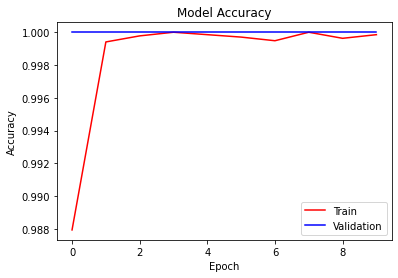

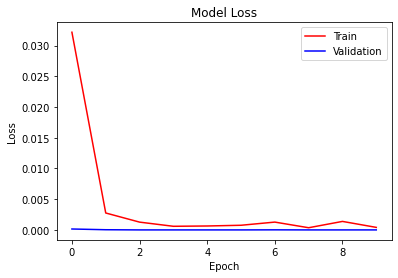

In [4]:
def build_densenet121():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Convolution2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(2,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID)
    plt.plot(history.history['accuracy'],color = 'red')
    plt.plot(history.history['val_accuracy'],color = 'blue')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc = 'best')
    plt.show()

    plt.plot(history.history['loss'],color = 'red')
    plt.plot(history.history['val_loss'],color = 'blue')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'],loc = 'best')
    plt.show()
    return model

model=build_densenet121()



In [ ]:
y_pred = model.predict(test_generator)
y_test = test_generator



from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

#kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

# precision
pre=precision_score(y_test, y_pred)
print('Precision =  %.3f'%pre)

# confusion matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

###DENSENET 201

In [5]:
import numpy as np 
import pandas as pd
from keras.preprocessing import image
from PIL import Image
from scipy import misc
import seaborn as sns
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Softmax, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam, SGD, Adamax, Adagrad
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size



Found 13550 images belonging to 2 classes.
Found 13550 images belonging to 2 classes.
Found 13550 images belonging to 2 classes.
Found 13550 images belonging to 2 classes.


74842112/74836368 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 3)       84        
_________________________________________________________________
densenet201 (Functional)     (None, None, None, 1920)  18321984  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1920)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1920)              7680      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1920)              0         
____________________________________________________________

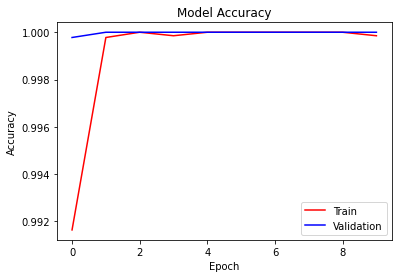

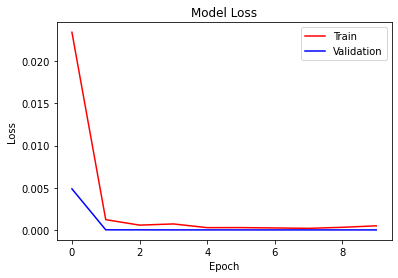

In [ ]:
def build_densenet201():
    densenet = DenseNet201(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Convolution2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(2,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID)
    plt.plot(history.history['accuracy'],color = 'red')
    plt.plot(history.history['val_accuracy'],color = 'blue')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc = 'best')
    plt.show()

    plt.plot(history.history['loss'],color = 'red')
    plt.plot(history.history['val_loss'],color = 'blue')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'],loc = 'best')
    plt.show()
    return model

model=build_densenet201()
y_pred = model.predict(test_generator)

###DENSENET 161

In [ ]:
import numpy as np 
import pandas as pd
from keras.preprocessing import image
from PIL import Image
from scipy import misc
import seaborn as sns
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Softmax, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam, SGD, Adamax, Adagrad
from tensorflow.keras.applications import DenseNet161
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size


In [ ]:
def build_densenet161():
    densenet = DenseNet161(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Convolution2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(2,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID)
    plt.plot(history.history['accuracy'],color = 'red')
    plt.plot(history.history['val_accuracy'],color = 'blue')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc = 'best')
    plt.show()

    plt.plot(history.history['loss'],color = 'red')
    plt.plot(history.history['val_loss'],color = 'blue')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'],loc = 'best')
    plt.show()
    return model

model=build_densenet161()
y_pred = model.predict(test_generator)

###DENSENET 169

In [ ]:
import numpy as np 
import pandas as pd
from keras.preprocessing import image
from PIL import Image
from scipy import misc
import seaborn as sns
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Softmax, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam, SGD, Adamax, Adagrad
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/MachineLearning',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size


In [ ]:
def build_densenet169():
    densenet = DenseNet169(weights='imagenet', include_top=False)

    input = Input(shape=(224, 224, 3))
    x = Convolution2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(2,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID)
    plt.plot(history.history['accuracy'],color = 'red')
    plt.plot(history.history['val_accuracy'],color = 'blue')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc = 'best')
    plt.show()

    plt.plot(history.history['loss'],color = 'red')
    plt.plot(history.history['val_loss'],color = 'blue')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'],loc = 'best')
    plt.show()
    return model

model=build_densenet169()